In [22]:
# Objective of this is to create a functional Runge-Kutta


import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [80]:
# stepsize = dt
stepsize = 0.01
# L96 Forcing Term
F = 8

# Define function (lor96)
def yprime(t, y):
    # Find dimensionality
    D = len(y)
    
    # Initialize output
    yprime = np.zeros(D)
    
    # Take care of edge cases:
    yprime[0] = (y[1] - y[D-2]) * y[D-1] - y[0]
    yprime[1] = (y[2] - y[D-1]) * y[0] - y[1]
    yprime[D-1] = (y[0] - y[D-3]) * y[D-2] - y[D-1]
    
    # ALl other cases
    for i in range(2, D-1):
        yprime[i] = (y[i+1] - y[i-2]) * y[i-1] - y[i]
    
    yprime = yprime + F
    return yprime
    

# How many time points
steps = 1000

# Initial point
y = np.zeros((5,steps))
y[:,0] = np.random.random(5)*3
t = 0

for i in range(1,steps):
    # each of these k and y are vectors
    k1 = stepsize * yprime(t, y[:,i-1])
    k2 = stepsize * yprime(t + stepsize / 2, y[:,i-1] + k1 / 2)
    k3 = stepsize * yprime(t + stepsize / 2, y[:,i-1] + k2 / 2)
    k4 = stepsize * yprime(t + stepsize, y[:,i-1] + k3)
    
    
    # Update path
    y[:,i] = y[:,i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    t = t + stepsize


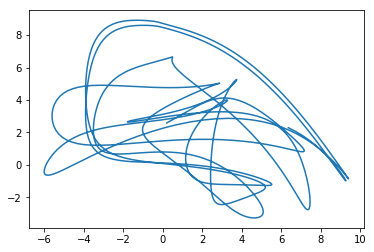

In [81]:
plt.plot(y[4,:], y[1,:])